In [1]:
import os
import logging
import plotly.express as px
import numpy as np
import pandas as pd
import zipfile
import fnmatch
import flirt.reader.empatica
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime, timedelta
import cvxopt as cv
from neurokit2 import eda_phasic
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates



In [2]:
rootPath = input("Enter Folder Path : ")
pattern = input("Enter File Name : ")
for root, dirs, files in os.walk(rootPath):
    for filename in fnmatch.filter(files, pattern):
        print(os.path.join(root, filename))
        zipfile.ZipFile(os.path.join(root, filename)).extractall(
            os.path.join(root, os.path.splitext(filename)[0]))
dir = os.path.splitext(pattern)[0]

# os.listdir(dir)


class process:
    def __init__(self) -> None:
        pass

    def moving_avarage_smoothing(X, k, description_str):
        S = np.zeros(X.shape[0])
        for t in tqdm(range(X.shape[0]), desc=description_str):
            if t < k:
                S[t] = np.mean(X[:t+1])
            else:
                S[t] = np.sum(X[t-k:t])/k
        return S

    def deviation_above_mean(unit, mean_unit, std_unit):
        if unit == 0:
            return (mean_unit)
        else:
            return (mean_unit + (unit*std_unit))

    def Starting_timeStamp(column, time_frames, deviation_metric):
        starting_time_index = []
        for i in range(len(column)-1):
            if column[i] < deviation_metric and column[i+1] > deviation_metric:
                starting_time_index.append(time_frames[i])
        return starting_time_index

    def Ending_timeStamp(column, time_frames, deviation_metric):
        time_index = []
        for i in range(len(column)-1):
            if column[i] > deviation_metric and column[i+1] < deviation_metric:
                time_index.append(time_frames[i])
        if column[len(column) - 1] > deviation_metric:
            time_index.insert(
                len(time_index), time_frames[len(time_frames) - 1])
        else:
            pass
        return time_index

In [3]:

path = './test_notebook/062221_A02078/'


In [4]:

# # def Extract_HRV_Information():

#     global hrv_features  # declaring global to get access them for combined plot function
#     global hrv_events_df  # declaring global to get access them for combined plot function

ibi = pd.read_csv(path+'IBI.csv')
mean_ibi = ibi[' IBI'].mean()
average_heart_rate = 60/mean_ibi
print('mean ibi is :', mean_ibi)
print('mean heart rate :', average_heart_rate.round())
ibis = flirt.reader.empatica.read_ibi_file_into_df(path+'IBI.csv')


hrv_features = flirt.get_hrv_features(ibis['ibi'], 128, 1, ["td", "fd"], 0.2)
hrv_features = hrv_features.dropna(how='any', axis=0)
hrv_features.reset_index(inplace=True)
hrv_features['datetime'] = hrv_features['datetime'].dt.tz_convert('US/Eastern')
hrv_features['datetime'] = pd.to_datetime(hrv_features['datetime'])
hrv_features['datetime'] = hrv_features['datetime'].apply(lambda x: datetime.replace(x, tzinfo=None))

hrv_features




    # hrv_features['Starting Timestamp'] = hrv_features['Starting Timestamp'].dt.tz_localize('UTC')
    # hrv_features['Ending Timestamp'] = hrv_features['Ending Timestamp'].dt.tz_localize('UTC')
    # hrv_features['Starting Timestamp'] = hrv_features['Starting Timestamp'].dt.tz_convert('US/Eastern')
    # hrv_features['Ending Timestamp'] = hrv_features['Ending Timestamp'].dt.tz_convert('US/Eastern')
    
    # hrv_features['datetime'] = hrv_features['datetime'].dt.tz_localize('UTC')






HRV features:   0%|          | 0/48996 [00:00<?, ?it/s]

mean ibi is : 0.7448725109752273
mean heart rate : 81.0


HRV features: 100%|██████████| 48996/48996 [00:41<00:00, 1188.08it/s]


Unable to remove memmapped file


,datetime,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,...,hrv_min_hr,hrv_max_hr,hrv_std_hr,hrv_total_power,hrv_vlf,hrv_lf,hrv_hf,hrv_lf_hf_ratio,hrv_lfnu,hrv_hfnu
0,2021-06-22 07:58:45,167,756.455838,765.625,125.000,27.333015,27.333663,4.0,2.395210,71.0,...,73.846154,87.272727,3.124953,530.306533,214.700257,123.631328,191.974947,0.643997,39.172646,60.827354
1,2021-06-22 07:58:46,167,756.455838,765.625,125.000,27.333015,27.333663,4.0,2.395210,71.0,...,73.846154,87.272727,3.124953,530.041874,214.006392,122.643385,193.392097,0.634170,38.806840,61.193160
2,2021-06-22 07:58:47,167,756.362275,765.625,125.000,27.333015,27.333663,4.0,2.395210,71.0,...,73.846154,87.272727,3.115137,523.953986,210.875384,118.885750,194.192853,0.612205,37.973132,62.026868
3,2021-06-22 07:58:48,167,756.175150,765.625,125.000,27.090289,27.090452,4.0,2.395210,70.0,...,73.846154,87.272727,3.091577,516.544421,207.435495,116.002355,193.106571,0.600717,37.527986,62.472014
4,2021-06-22 07:58:49,167,755.894461,765.625,125.000,27.114970,27.117583,4.0,2.395210,70.0,...,73.846154,87.272727,3.094217,516.082591,206.771959,112.993584,196.317047,0.575567,36.530779,63.469221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43786,2021-06-22 21:35:16,132,826.349432,828.125,171.875,42.315838,42.320040,25.0,18.939394,88.0,...,66.206897,81.702128,3.459132,829.973879,197.762255,185.986041,446.225583,0.416798,29.418320,70.581680
43787,2021-06-22 21:35:17,132,826.586174,828.125,171.875,42.427309,42.429991,25.0,18.939394,88.0,...,66.206897,81.702128,3.431615,809.794890,185.219523,185.970939,438.604428,0.424006,29.775580,70.224420
43788,2021-06-22 21:35:18,132,826.941288,828.125,171.875,42.253932,42.253932,25.0,18.939394,87.0,...,66.206897,81.702128,3.360283,787.407311,168.255029,196.307834,422.844447,0.464255,31.705905,68.294095
43789,2021-06-22 21:35:19,132,827.178030,828.125,171.875,42.253932,42.253932,25.0,18.939394,87.0,...,66.206897,81.702128,3.342760,785.794887,161.546927,204.086159,420.161802,0.485732,32.693124,67.306876


In [5]:
hrv_features['datetime']

0       2021-06-22 07:58:45
1       2021-06-22 07:58:46
2       2021-06-22 07:58:47
3       2021-06-22 07:58:48
4       2021-06-22 07:58:49
                ...        
43786   2021-06-22 21:35:16
43787   2021-06-22 21:35:17
43788   2021-06-22 21:35:18
43789   2021-06-22 21:35:19
43790   2021-06-22 21:35:20
Name: datetime, Length: 43791, dtype: datetime64[ns]

In [6]:
    # smoothing the curve
print('\n', '******************** Smoothing The Curve ********************', '\n')
MAG_K500 = process.moving_avarage_smoothing(
    hrv_features['hrv_rmssd'], 500, "Processing HRV Data")

hrv_features['MAG_K500'] = MAG_K500
# hrv_features.to_csv("./Metadata/"+ dir+"_HRV.csv")
# hrv_features.to_csv(os.path.join('./Metadata'+dir+'_HRV.csv'))
mean_rmssd = hrv_features['hrv_rmssd'].mean()
std_rmssd = hrv_features['hrv_rmssd'].std()

# getting the starrting and ending time of of the signal
starting_timestamp = process.Starting_timeStamp(hrv_features['MAG_K500'], hrv_features['datetime'],
                                                process.deviation_above_mean(1, mean_rmssd, std_rmssd))
ending_timestamp = process.Ending_timeStamp(hrv_features['MAG_K500'], hrv_features['datetime'],
                                            process.deviation_above_mean(1, mean_rmssd, std_rmssd))



 ******************** Smoothing The Curve ******************** 



In [7]:
starting_timestamp, ending_timestamp

([Timestamp('2021-06-22 08:57:59'),
  Timestamp('2021-06-22 09:20:36'),
  Timestamp('2021-06-22 11:25:04'),
  Timestamp('2021-06-22 18:18:01'),
  Timestamp('2021-06-22 20:46:33')],
 [Timestamp('2021-06-22 09:10:50'),
  Timestamp('2021-06-22 09:25:35'),
  Timestamp('2021-06-22 11:49:39'),
  Timestamp('2021-06-22 18:38:26'),
  Timestamp('2021-06-22 20:48:52')])

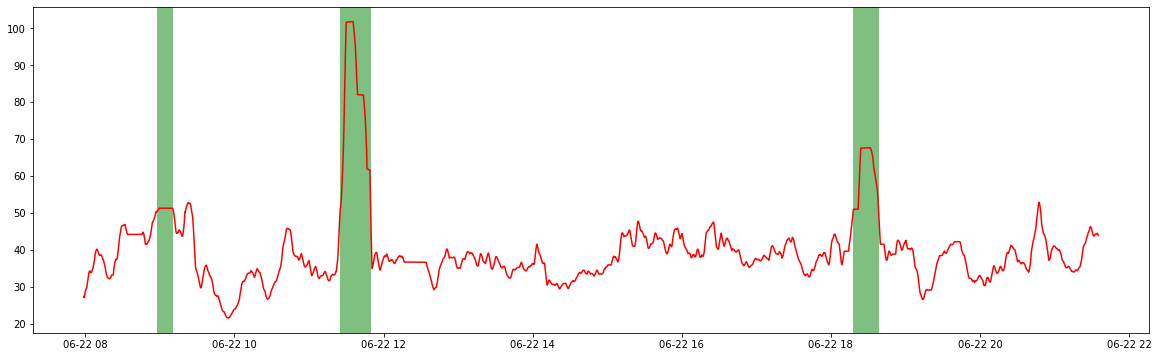

In [8]:

if len(starting_timestamp) < 1:
    fig, ax2 = plt.subplots(figsize=(30, 10))
    ax2.plot(hrv_features['datetime'],
                hrv_features['MAG_K500'], color='red')
    # fig.savefig('./Plots/HRV_figure.png')
else:
    if starting_timestamp > ending_timestamp:
        ending_timestamp.pop(0)
    else:
        pass
    difference = []  # initialization of result list
    time_delta_minutes = []
    desired_time_index = []
    zip_object = zip(ending_timestamp, starting_timestamp)
    for list1_i, list2_i in zip_object:
        # append each difference to list
        difference.append(list1_i-list2_i)
    for i in difference:
        time_delta_minutes.append(i.total_seconds()/60)
    time_delta_minutes
    for i in range(len(time_delta_minutes)):
        if time_delta_minutes[i] > 5.00:
            desired_time_index.append(i)
    starting_timestamp_df = pd.DataFrame(starting_timestamp)
    ending_timestamp_df = pd.DataFrame(ending_timestamp)
    frames = (starting_timestamp_df, ending_timestamp_df)
    hrv_events_df = pd.concat(frames,  axis=1)
    hrv_events_df.columns = ['Starting Timestamp', 'Ending Timestamp']
    hrv_events_df['Starting Timestamp'] = hrv_events_df['Starting Timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S")
    hrv_events_df['Ending Timestamp'] = hrv_events_df['Ending Timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S")
    hrv_events_df = hrv_events_df.loc[desired_time_index, :]        
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(hrv_features['datetime'],
            hrv_features['MAG_K500'], color='red')
    for d in hrv_events_df.index:
        ax.axvspan(hrv_events_df['Starting Timestamp'][d], hrv_events_df['Ending Timestamp']
                    [d], facecolor="g", edgecolor="none", alpha=0.5)
    # ax.relim()
    # ax.autoscale_view()
    #         fig.savefig('./Plots/HRV_figure.png')
    #         return hrv_features, hrv_events_df

# Extract_HRV_Information()

In [9]:
hrv_features

,datetime,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,...,hrv_max_hr,hrv_std_hr,hrv_total_power,hrv_vlf,hrv_lf,hrv_hf,hrv_lf_hf_ratio,hrv_lfnu,hrv_hfnu,MAG_K500
0,2021-06-22 07:58:45,167,756.455838,765.625,125.000,27.333015,27.333663,4.0,2.395210,71.0,...,87.272727,3.124953,530.306533,214.700257,123.631328,191.974947,0.643997,39.172646,60.827354,27.333663
1,2021-06-22 07:58:46,167,756.455838,765.625,125.000,27.333015,27.333663,4.0,2.395210,71.0,...,87.272727,3.124953,530.041874,214.006392,122.643385,193.392097,0.634170,38.806840,61.193160,27.333663
2,2021-06-22 07:58:47,167,756.362275,765.625,125.000,27.333015,27.333663,4.0,2.395210,71.0,...,87.272727,3.115137,523.953986,210.875384,118.885750,194.192853,0.612205,37.973132,62.026868,27.333663
3,2021-06-22 07:58:48,167,756.175150,765.625,125.000,27.090289,27.090452,4.0,2.395210,70.0,...,87.272727,3.091577,516.544421,207.435495,116.002355,193.106571,0.600717,37.527986,62.472014,27.272860
4,2021-06-22 07:58:49,167,755.894461,765.625,125.000,27.114970,27.117583,4.0,2.395210,70.0,...,87.272727,3.094217,516.082591,206.771959,112.993584,196.317047,0.575567,36.530779,63.469221,27.241805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43786,2021-06-22 21:35:16,132,826.349432,828.125,171.875,42.315838,42.320040,25.0,18.939394,88.0,...,81.702128,3.459132,829.973879,197.762255,185.986041,446.225583,0.416798,29.418320,70.581680,43.892182
43787,2021-06-22 21:35:17,132,826.586174,828.125,171.875,42.427309,42.429991,25.0,18.939394,88.0,...,81.702128,3.431615,809.794890,185.219523,185.970939,438.604428,0.424006,29.775580,70.224420,43.877657
43788,2021-06-22 21:35:18,132,826.941288,828.125,171.875,42.253932,42.253932,25.0,18.939394,87.0,...,81.702128,3.360283,787.407311,168.255029,196.307834,422.844447,0.464255,31.705905,68.294095,43.863392
43789,2021-06-22 21:35:19,132,827.178030,828.125,171.875,42.253932,42.253932,25.0,18.939394,87.0,...,81.702128,3.342760,785.794887,161.546927,204.086159,420.161802,0.485732,32.693124,67.306876,43.849117


Magnitude Mean :  63.72644524385312

 ******************** Smoothing The ACC Curve ******************** 




Average Magnitude of the Acc Data :  63.72644524385312


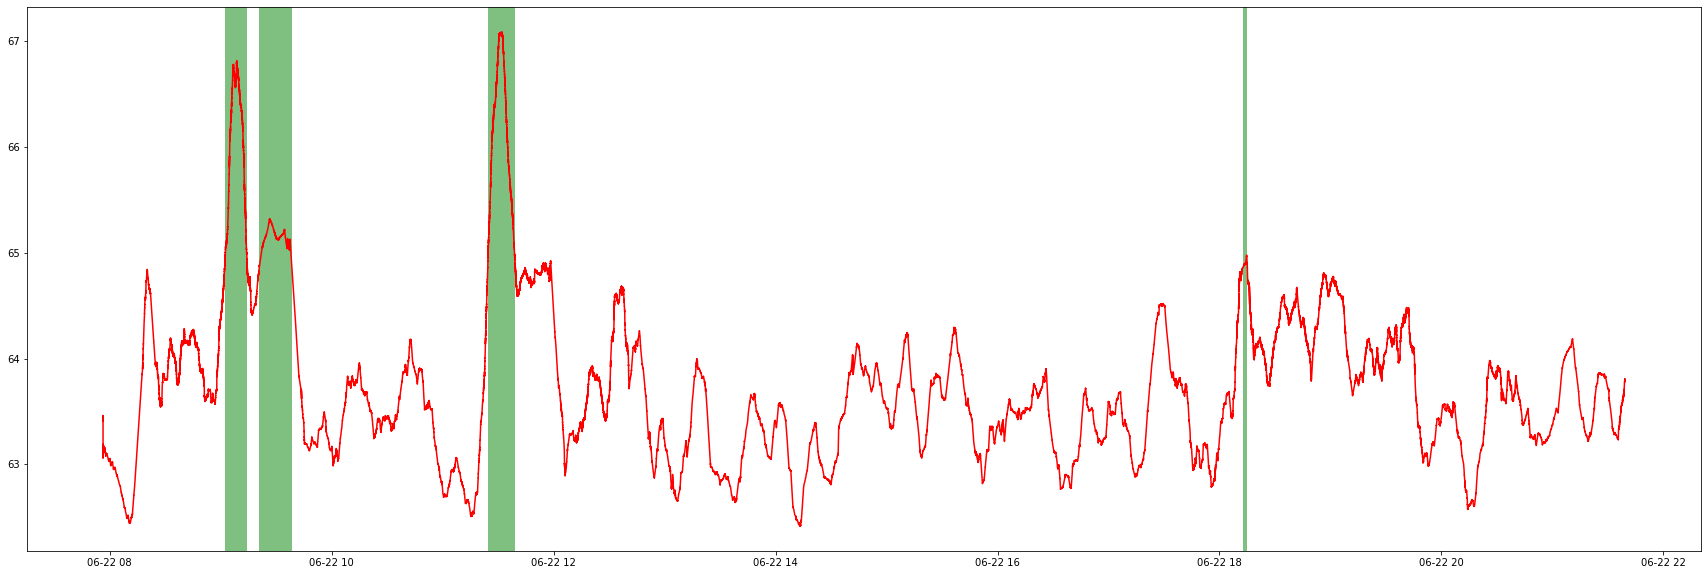

In [10]:

def Extract_ACC_Infromation():
    global acc_df
    global acc_events_df

    acc_df = pd.read_csv(path+'ACC.csv')
    acc_df = flirt.reader.empatica.read_acc_file_into_df(path+'ACC.csv')
    acc_df['Magnitude'] = np.sqrt(
        acc_df['acc_x']**2 + acc_df['acc_y']**2 + acc_df['acc_z']**2)
    print("Magnitude Mean : ", acc_df['Magnitude'].mean())
    acc_df.reset_index(inplace=True)
    
    acc_df['datetime'] = acc_df['datetime'].dt.tz_convert('US/Eastern')
    acc_df['datetime'] = pd.to_datetime(acc_df['datetime'])
    acc_df['datetime'] = acc_df['datetime'].apply(lambda x: datetime.replace(x, tzinfo=None))

    print('\n', '******************** Smoothing The ACC Curve ********************', '\n')
    MAG_K500 = process.moving_avarage_smoothing(
        acc_df['Magnitude'], 15000, "Processing ACC Data")

    acc_df['MAG_K500'] = MAG_K500
    # acc_df.to_csv("./Metadata/"+ dir+"_ACC.csv")
    mean_acc_magnitude = acc_df['Magnitude'].mean()
    std_acc_magnitude = acc_df['Magnitude'].std()
    print("Average Magnitude of the Acc Data : ", mean_acc_magnitude)

    starting_timestamp = process.Starting_timeStamp(acc_df['MAG_K500'], acc_df['datetime'],
                                                    process.deviation_above_mean(0.20, mean_acc_magnitude, std_acc_magnitude))

    ending_timestamp = process.Ending_timeStamp(acc_df['MAG_K500'], acc_df['datetime'],
                                                process.deviation_above_mean(0.20, mean_acc_magnitude, std_acc_magnitude))

    if len(starting_timestamp) < 1:
        fig, ax2 = plt.subplots(figsize=(30, 10))
        ax2.plot(acc_df['datetime'], acc_df['MAG_K500'], color='red')
        fig.savefig('./Plots/ACC_figure.png')
    else:
        if starting_timestamp > ending_timestamp:
            ending_timestamp.pop(0)
        difference = []  # initialization of result list
        time_delta_minutes = []
        desired_time_index = []
        zip_object = zip(ending_timestamp, starting_timestamp)

        for list1_i, list2_i in zip_object:
            # append each difference to list
            difference.append(list1_i-list2_i)

        for i in difference:
            time_delta_minutes.append(i.total_seconds()/60)

        for i in range(len(time_delta_minutes)):
            if time_delta_minutes[i] > 2.00:
                desired_time_index.append(i)

        starting_timestamp_df = pd.DataFrame(starting_timestamp)
        ending_timestamp_df = pd.DataFrame(ending_timestamp)
        frames = (starting_timestamp_df, ending_timestamp_df)
        acc_events_df = pd.concat(frames,  axis=1)
        acc_events_df.columns = ['Starting Timestamp', 'Ending Timestamp']
        acc_events_df['Starting Timestamp'] = acc_events_df['Starting Timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S")
        acc_events_df['Ending Timestamp'] = acc_events_df['Ending Timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S")
        acc_events_df = acc_events_df.loc[desired_time_index, :]
        # acc_events_df.to_csv(rootPath+"timestamp_" +dir+ "_ACC.csv")   
        fig, ax2 = plt.subplots(figsize=(30, 10))
        ax2.plot(acc_df['datetime'], acc_df['MAG_K500'], color='red')
        for d in acc_events_df.index:
            ax2.axvspan(acc_events_df['Starting Timestamp'][d], acc_events_df['Ending Timestamp']
                        [d], facecolor="g", edgecolor="none", alpha=0.5)
        ax2.relim()
        ax2.autoscale_view()
        # fig.savefig('./Plots/ACC_figure.png')
        
Extract_ACC_Infromation()


 ******************** Smoothing The EDA Phasic Curve ******************** 



,datetime,eda,tonic,phasic
0,2021-06-22 07:56:24.000,0.000000,0.326855,0.000000
1,2021-06-22 07:56:24.250,0.645363,0.329068,0.000000
2,2021-06-22 07:56:24.500,0.770851,0.331778,0.442389
3,2021-06-22 07:56:24.750,0.735264,0.334963,0.378906
4,2021-06-22 07:56:25.000,0.636667,0.338600,0.326358
...,...,...,...,...
197473,2021-06-22 21:39:12.250,0.016646,-0.057420,0.097546
197474,2021-06-22 21:39:12.500,0.015366,-0.034097,0.086250
197475,2021-06-22 21:39:12.750,0.017927,-0.011275,0.076228
197476,2021-06-22 21:39:13.000,0.016646,0.010973,0.067347


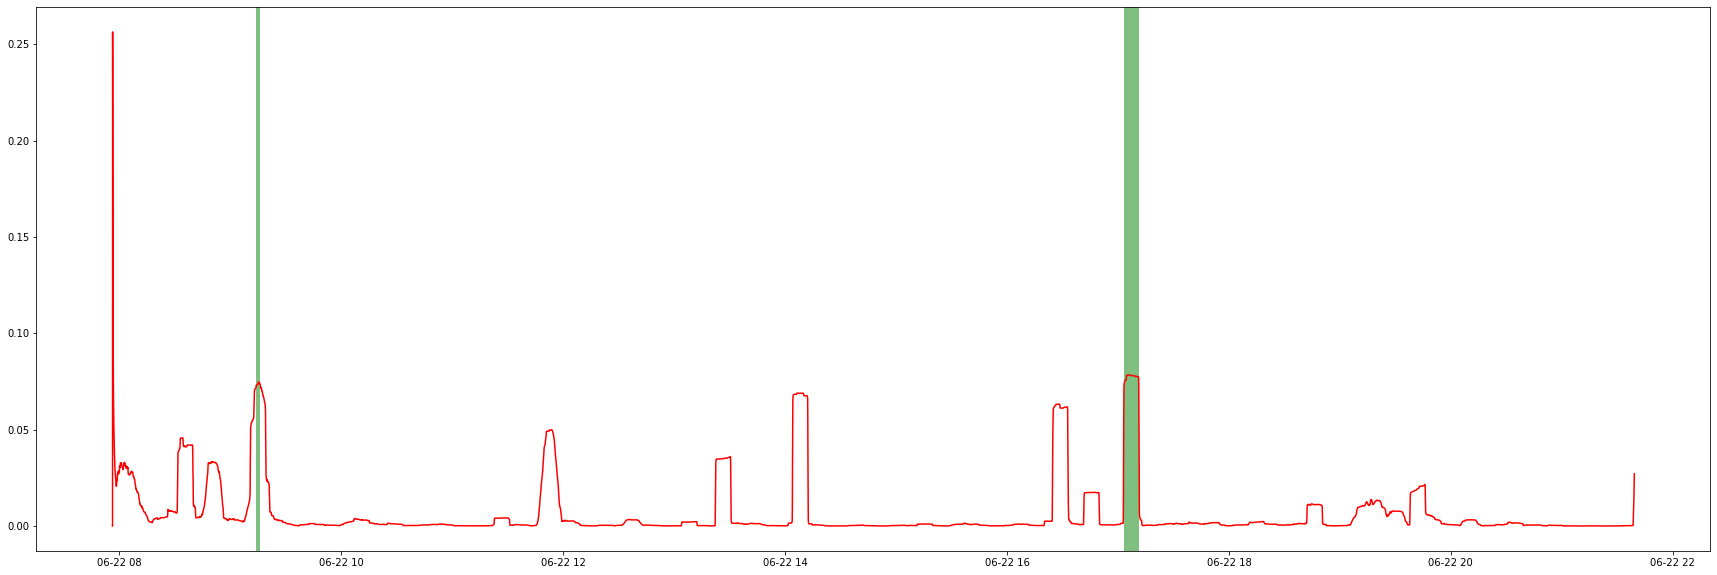

In [11]:

def Extract_GSR_Phasic_Information():
    global eda_df
    global eda_phasic_df
    global eda_phasic_events_df

    eda_df = pd.read_csv(path+'EDA.csv')
    eda_df = flirt.reader.empatica.read_eda_file_into_df(path+'EDA.csv')
    eda_df.reset_index(inplace=True)
    
    eda_df['datetime'] = eda_df['datetime'].dt.tz_convert('US/Eastern')
    eda_df['datetime'] = pd.to_datetime(eda_df['datetime'])
    eda_df['datetime'] = eda_df['datetime'].apply(lambda x: datetime.replace(x, tzinfo=None))
    
    
    eda = np.array(eda_df['eda'])
    Phasic_Tonic_DF = eda_phasic(eda, 4, method='cvxEDA')
    eda_df['tonic'] = Phasic_Tonic_DF['EDA_Tonic']
    eda_df['phasic'] = Phasic_Tonic_DF['EDA_Phasic']
    eda_phasic_df = eda_df.copy()

    print('\n', '******************** Smoothing The EDA Phasic Curve ********************', '\n')
    MAG_K500 = process.moving_avarage_smoothing(
        eda_phasic_df['phasic'], 2000, "Processing EDA Phasic Data")

    eda_phasic_df['MAG_K500'] = MAG_K500
    # hrv_features.to_csv('hrv_features.csv')
    mean_eda_phasic = eda_phasic_df['phasic'].mean()
    std_eda_phasic = eda_phasic_df['phasic'].std()

    starting_timestamp = process.Starting_timeStamp(eda_phasic_df['MAG_K500'], eda_phasic_df['datetime'],
                                                    process.deviation_above_mean(1, mean_eda_phasic, std_eda_phasic))

    ending_timestamp = process.Ending_timeStamp(eda_phasic_df['MAG_K500'], eda_phasic_df['datetime'],
                                                process.deviation_above_mean(1, mean_eda_phasic, std_eda_phasic))

    if len(starting_timestamp) < 1:
        fig, ax2 = plt.subplots(figsize=(30, 10))
        ax2.plot(eda_phasic_df['datetime'],
                 eda_phasic_df['MAG_K500'], color='red')
        fig.savefig('./Plots/EDA_Phasic_figure.png')
    else:
        if starting_timestamp > ending_timestamp:
            ending_timestamp.pop(0)
        difference = []  # initialization of result list
        time_delta_minutes = []
        desired_time_index = []
        zip_object = zip(ending_timestamp, starting_timestamp)
        for list1_i, list2_i in zip_object:
            # append each difference to list
            difference.append(list1_i-list2_i)
        for i in difference:
            time_delta_minutes.append(i.total_seconds()/60)
        for i in range(len(time_delta_minutes)):
            if time_delta_minutes[i] > 2.00:
                desired_time_index.append(i)
        starting_timestamp_df = pd.DataFrame(starting_timestamp)
        ending_timestamp_df = pd.DataFrame(ending_timestamp)
        frames = (starting_timestamp_df, ending_timestamp_df)
        eda_phasic_events_df = pd.concat(frames,  axis=1)
        eda_phasic_events_df.columns = [
            'Starting Timestamp', 'Ending Timestamp']
        eda_phasic_events_df['Starting Timestamp'] = eda_phasic_events_df['Starting Timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S")
        eda_phasic_events_df['Ending Timestamp'] = eda_phasic_events_df['Ending Timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S")
        eda_phasic_events_df = eda_phasic_events_df.loc[desired_time_index, :]
        # eda_phasic_events_df.to_csv(rootPath+"timestamp_" + dir + "_EDA.csv")
        fig, ax3 = plt.subplots(figsize=(30, 10))
        ax3.plot(eda_phasic_df['datetime'],
                 eda_phasic_df['MAG_K500'], color='red')
        for d in eda_phasic_events_df.index:
            ax3.axvspan(eda_phasic_events_df['Starting Timestamp'][d],
                        eda_phasic_events_df['Ending Timestamp'][d], facecolor="g", edgecolor="none", alpha=0.5)
        ax3.relim()
        ax3.autoscale_view()
        return eda_df

Extract_GSR_Phasic_Information()


 ******************** Smoothing The EDA Tonic Curve ******************** 




entering final else block


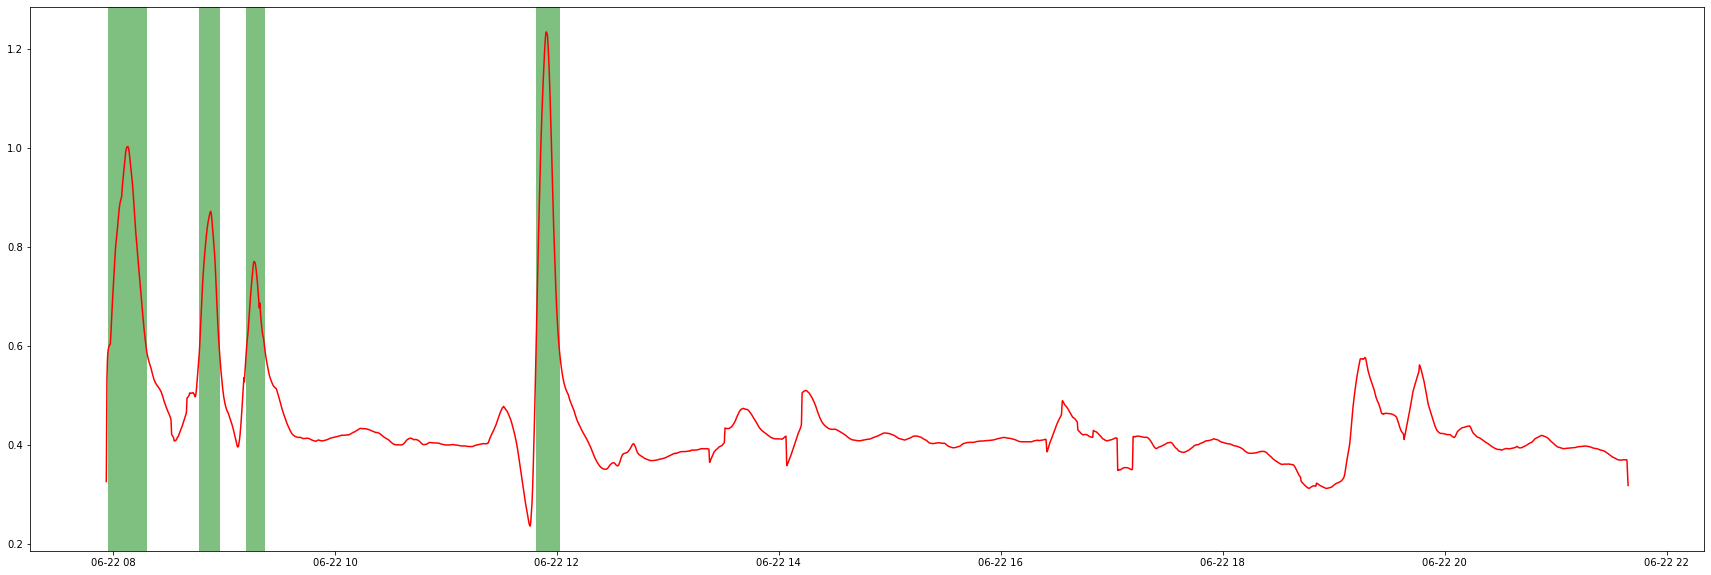

In [12]:

def Extract_GSR_Tonic_Information():
    global eda_tonic_df
    global eda_tonic_events_df

    eda_df = pd.read_csv(path+'EDA.csv')
    eda_df = flirt.reader.empatica.read_eda_file_into_df(path+'EDA.csv')
    eda_df.reset_index(inplace=True)
    
    eda_df['datetime'] = eda_df['datetime'].dt.tz_convert('US/Eastern')
    eda_df['datetime'] = pd.to_datetime(eda_df['datetime'])
    eda_df['datetime'] = eda_df['datetime'].apply(lambda x: datetime.replace(x, tzinfo=None))
    
    
    eda = np.array(eda_df['eda'])
    Phasic_Tonic_DF = eda_phasic(eda, 4, method='cvxEDA')
    eda_df['tonic'] = Phasic_Tonic_DF['EDA_Tonic']
    eda_df['phasic'] = Phasic_Tonic_DF['EDA_Phasic']
    eda_tonic_df = eda_df.copy()

    print('\n', '******************** Smoothing The EDA Tonic Curve ********************', '\n')
    MAG_K500 = process.moving_avarage_smoothing(
        eda_tonic_df['tonic'], 2000, "Processing EDA Tonic Data")
    eda_tonic_df['MAG_K500'] = MAG_K500
    # hrv_features.to_csv('hrv_features.csv')
    mean_eda_tonic = eda_tonic_df['tonic'].mean()
    std_eda_tonic = eda_tonic_df['tonic'].std()

    starting_timestamp = process.Starting_timeStamp(eda_tonic_df['MAG_K500'], eda_tonic_df['datetime'],
                                                    process.deviation_above_mean(1, mean_eda_tonic, std_eda_tonic))

    ending_timestamp = process.Ending_timeStamp(eda_tonic_df['MAG_K500'], eda_tonic_df['datetime'],
                                                process.deviation_above_mean(1, mean_eda_tonic, std_eda_tonic))

    if len(starting_timestamp) < 1:
        fig, ax2 = plt.subplots(figsize=(30, 10))
        ax2.plot(eda_tonic_df['datetime'],
                 eda_tonic_df['MAG_K500'], color='red')
        fig.savefig('./Plots/EDA_Phasic_figure.png')
    else:
        print("entering final else block")
        if starting_timestamp > ending_timestamp:
            ending_timestamp.pop(0)
        difference = []  # initialization of result list
        time_delta_minutes = []
        desired_time_index = []
        zip_object = zip(ending_timestamp, starting_timestamp)
        for list1_i, list2_i in zip_object:
            # append each difference to list
            difference.append(list1_i-list2_i)
        for i in difference:
            time_delta_minutes.append(i.total_seconds()/60)
        for i in range(len(time_delta_minutes)):
            if time_delta_minutes[i] > 2.00:
                desired_time_index.append(i)
        starting_timestamp_df = pd.DataFrame(starting_timestamp)
        ending_timestamp_df = pd.DataFrame(ending_timestamp)
        frames = (starting_timestamp_df, ending_timestamp_df)
        eda_tonic_events_df = pd.concat(frames,  axis=1)
        eda_tonic_events_df.columns = [
            'Starting Timestamp', 'Ending Timestamp']
        eda_tonic_events_df['Starting Timestamp'] = eda_tonic_events_df['Starting Timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S")
        eda_tonic_events_df['Ending Timestamp'] = eda_tonic_events_df['Ending Timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S")
        eda_tonic_events_df = eda_tonic_events_df.loc[desired_time_index, :]
        # eda_tonic_events_df.to_csv(rootPath+"timestamp_" +dir+ "_EDA.csv")
        
        fig, ax4 = plt.subplots(figsize=(30, 10))
        ax4.plot(eda_tonic_df['datetime'],
                 eda_tonic_df['MAG_K500'], color='red')
        for d in eda_tonic_events_df.index:
            ax4.axvspan(eda_tonic_events_df['Starting Timestamp'][d],
                        eda_tonic_events_df['Ending Timestamp'][d], facecolor="g", edgecolor="none", alpha=0.5)
        ax4.relim()
        ax4.autoscale_view()

Extract_GSR_Tonic_Information()


 ******************** Smoothing The Heart Rate Curve ******************** 



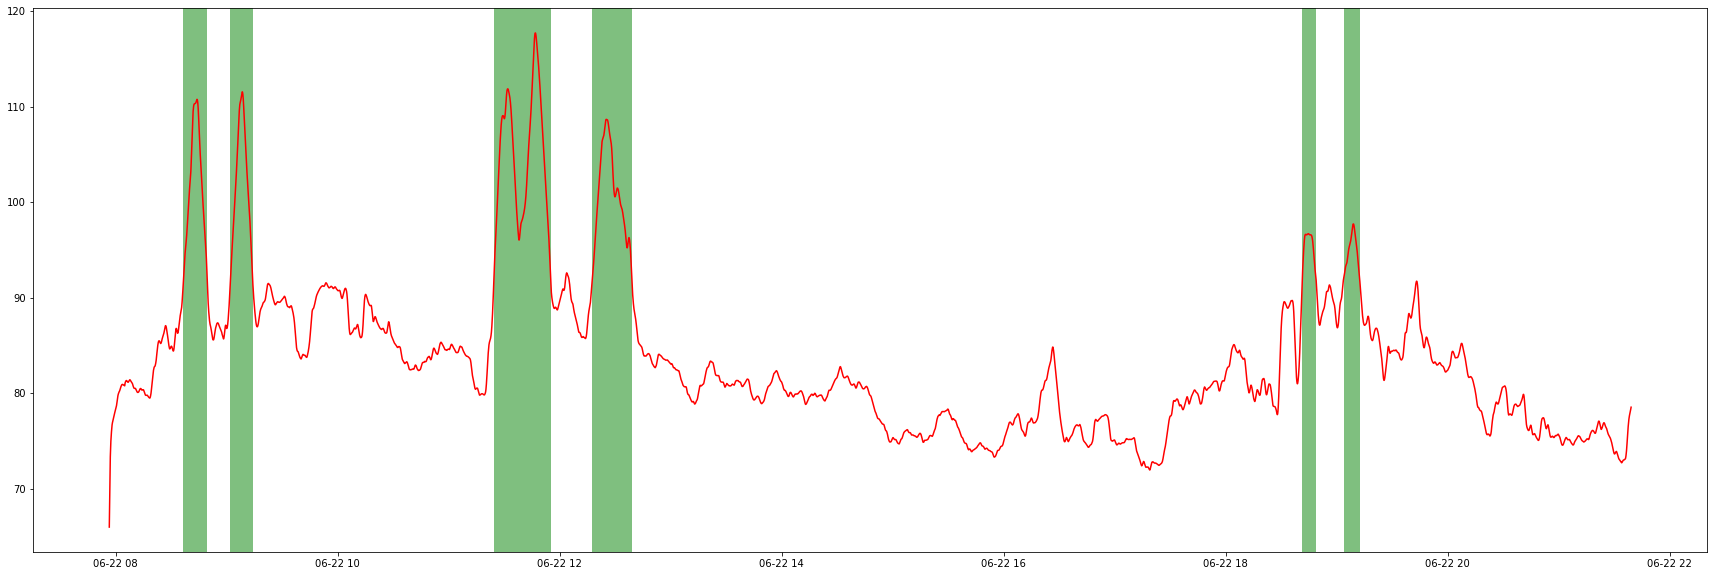

In [13]:

def Extract_Heart_Rate_Features():
    global hr_df
    global hr_events_df

    hr_df = flirt.reader.empatica.read_hr_file_into_df(path+'HR.csv')
    hr_df.reset_index(inplace=True)
    
    hr_df['datetime'] = hr_df['datetime'].dt.tz_convert('US/Eastern')
    hr_df['datetime'] = pd.to_datetime(hr_df['datetime'])
    hr_df['datetime'] = hr_df['datetime'].apply(lambda x: datetime.replace(x, tzinfo=None))



    print('\n', '******************** Smoothing The Heart Rate Curve ********************', '\n')
    MAG_K500 = process.moving_avarage_smoothing(
        hr_df['hr'], 500, "Processing Heart Rate Data")

    hr_df['MAG_K500'] = MAG_K500
    # hrv_features.to_csv('hrv_features.csv')
    hr_avg = hr_df['MAG_K500'].mean()
    hr_std = hr_df['MAG_K500'].std()

    starting_timestamp = process.Starting_timeStamp(
        hr_df['MAG_K500'], hr_df['datetime'], process.deviation_above_mean(1, hr_avg, hr_std))
    ending_timestamp = process.Ending_timeStamp(
        hr_df['MAG_K500'], hr_df['datetime'], process.deviation_above_mean(1, hr_avg, hr_std))

    if len(starting_timestamp) < 1:
        fig, ax2 = plt.subplots(figsize=(30, 10))
        ax2.plot(hr_df['datetime'], hr_df['MAG_K500'], color='red')
        fig.savefig('./Plots/Heart_rate_figure.png')
    else:
        if starting_timestamp > ending_timestamp:
            ending_timestamp.pop(0)
        difference = []  # initialization of result list
        time_delta_minutes = []
        desired_time_index = []
        zip_object = zip(ending_timestamp, starting_timestamp)
        for list1_i, list2_i in zip_object:
            # append each difference to list
            difference.append(list1_i-list2_i)
        for i in difference:
            time_delta_minutes.append(i.total_seconds()/60)
        for i in range(len(time_delta_minutes)):
            if time_delta_minutes[i] > 2.00:
                desired_time_index.append(i)
        starting_timestamp_df = pd.DataFrame(starting_timestamp)
        ending_timestamp_df = pd.DataFrame(ending_timestamp)
        frames = (starting_timestamp_df, ending_timestamp_df)
        hr_events_df = pd.concat(frames,  axis=1)
        hr_events_df.columns = ['Starting Timestamp', 'Ending Timestamp']
        hr_events_df['Starting Timestamp'] = hr_events_df['Starting Timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S")
        hr_events_df['Ending Timestamp'] = hr_events_df['Ending Timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S")
        hr_events_df = hr_events_df.loc[desired_time_index, :]
        # hr_events_df.to_csv(rootPath+"timestamp_" +dir+ "_EDA.csv")
   
        fig, ax4 = plt.subplots(figsize=(30, 10))
        ax4.plot(hr_df['datetime'], hr_df['MAG_K500'], color='red')
        for d in hr_events_df.index:
            ax4.axvspan(hr_events_df['Starting Timestamp'][d], hr_events_df['Ending Timestamp']
                        [d], facecolor="g", edgecolor="none", alpha=0.5)
        ax4.relim()
        ax4.autoscale_view()

Extract_Heart_Rate_Features()        

In [14]:
def handle_overlapping_timestamps():
    
    global concatnated_frame
    
    hrv_events_df_copy = hrv_events_df.copy()
    hr_events_df_copy = hr_events_df.copy()
    acc_events_df_copy = acc_events_df.copy()
    eda_phasic_events_df_copy = eda_phasic_events_df.copy()
    eda_tonic_events_df_copy = eda_tonic_events_df.copy()
    
    concatnated_frame = pd.concat([hrv_events_df_copy, hr_events_df_copy, acc_events_df_copy, eda_phasic_events_df_copy, eda_tonic_events_df_copy])
    concatnated_frame = pd.DataFrame(concatnated_frame)
    concatnated_frame["Starting Timestamp"] = concatnated_frame["Starting Timestamp"].apply(lambda x: pd.Timestamp(x).timestamp())
    concatnated_frame["Ending Timestamp"] = concatnated_frame["Ending Timestamp"].apply(lambda x: pd.Timestamp(x).timestamp())
    concatnated_frame = concatnated_frame.sort_values(by=['Starting Timestamp', 'Ending Timestamp']).reset_index(drop = True)
    concatnated_frame['Starting Timestamp'] = concatnated_frame["Starting Timestamp"].apply(lambda x: pd.to_datetime(x, unit='s'))
    concatnated_frame['Ending Timestamp'] = concatnated_frame['Ending Timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))
    concatnated_frame = concatnated_frame.reset_index(drop = True)
    
    print('###################### Handling Overlapping Events ######################')

    for i in range(int(len(concatnated_frame)/2)):
        for i in tqdm(range(len(concatnated_frame)-1)):
            try:
                delta_a = concatnated_frame['Ending Timestamp'][i] - concatnated_frame['Starting Timestamp'][i]
                delta_b = concatnated_frame['Ending Timestamp'][i+1] - concatnated_frame['Starting Timestamp'][i+1]
                c1 = min(concatnated_frame['Starting Timestamp'][i], concatnated_frame['Starting Timestamp'][i+1])
                c2 = max(concatnated_frame['Ending Timestamp'][i], concatnated_frame['Ending Timestamp'][i+1])
                Dc = c2-c1
                if ((delta_a+delta_b)>Dc):
                    concatnated_frame['Starting Timestamp'][i] = c1
                    concatnated_frame['Ending Timestamp'][i] = c2
                    concatnated_frame = concatnated_frame.drop(concatnated_frame.index[i+1]).reset_index(drop=True)
            except KeyError as error:
                logging.info("index overflow handling exception")

    return concatnated_frame

handle_overlapping_timestamps()

###################### Handling Overlapping Events ######################


,Starting Timestamp,Ending Timestamp
0,2021-06-22 07:57:16,2021-06-22 08:18:18
1,2021-06-22 08:36:40,2021-06-22 08:57:37
2,2021-06-22 08:57:59,2021-06-22 09:38:28
3,2021-06-22 11:24:24,2021-06-22 12:01:29
4,2021-06-22 12:17:37,2021-06-22 12:38:59
5,2021-06-22 17:03:16,2021-06-22 17:11:14
6,2021-06-22 18:12:48,2021-06-22 18:15:03
7,2021-06-22 18:18:01,2021-06-22 18:38:26
8,2021-06-22 18:41:21,2021-06-22 18:48:46
9,2021-06-22 19:03:39,2021-06-22 19:12:21


In [30]:
def handle_smaller_events(concatnated_frame):
    global merged_smaller_events
    print('###################### Handling smaller Events ######################')
    
    concatnated_frame['Starting Timestamp'] = concatnated_frame["Starting Timestamp"].apply(lambda x: pd.to_datetime(x, unit='s'))
    concatnated_frame['Ending Timestamp'] = concatnated_frame['Ending Timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))
                
    for i in tqdm(range(int(len(concatnated_frame)/2))):
        for i in range(len(concatnated_frame)-1):
            try:
                if (concatnated_frame['Starting Timestamp'][i+1] - concatnated_frame['Ending Timestamp'][i] < timedelta(minutes=15)):
                    concatnated_frame['Ending Timestamp'][i] = concatnated_frame['Ending Timestamp'][i+1]
                    concatnated_frame = concatnated_frame.drop(concatnated_frame.index[i+1]).reset_index(drop=True)
                    merged_smaller_events = concatnated_frame
            except KeyError as error:
                logging.info('ignore index overflow error')
                
    return merged_smaller_events


handle_smaller_events(concatnated_frame)

###################### Handling smaller Events ######################


,Starting Timestamp,Ending Timestamp
0,2021-06-22 07:57:16,2021-06-22 08:18:18
1,2021-06-22 08:36:40,2021-06-22 09:38:28
2,2021-06-22 11:24:24,2021-06-22 12:01:29
3,2021-06-22 12:17:37,2021-06-22 12:38:59
4,2021-06-22 17:03:16,2021-06-22 17:11:14
5,2021-06-22 18:12:48,2021-06-22 19:12:21


In [31]:

merged_smaller_events_2 = merged_smaller_events.copy()

merged_smaller_events['Starting Timestamp'] = merged_smaller_events['Starting Timestamp'].dt.strftime("%m/%d/%Y, %I:%M:%S %p")
merged_smaller_events['Ending Timestamp'] = merged_smaller_events['Ending Timestamp'].dt.strftime("%m/%d/%Y, %I:%M:%S %p")
merged_smaller_events.index = merged_smaller_events.index + 1


merged_smaller_events

,Starting Timestamp,Ending Timestamp
1,"06/22/2021, 07:57:16 AM","06/22/2021, 08:18:18 AM"
2,"06/22/2021, 08:36:40 AM","06/22/2021, 09:38:28 AM"
3,"06/22/2021, 11:24:24 AM","06/22/2021, 12:01:29 PM"
4,"06/22/2021, 12:17:37 PM","06/22/2021, 12:38:59 PM"
5,"06/22/2021, 05:03:16 PM","06/22/2021, 05:11:14 PM"
6,"06/22/2021, 06:12:48 PM","06/22/2021, 07:12:21 PM"



 ******************************* Preparing for combined chart **************************************** 



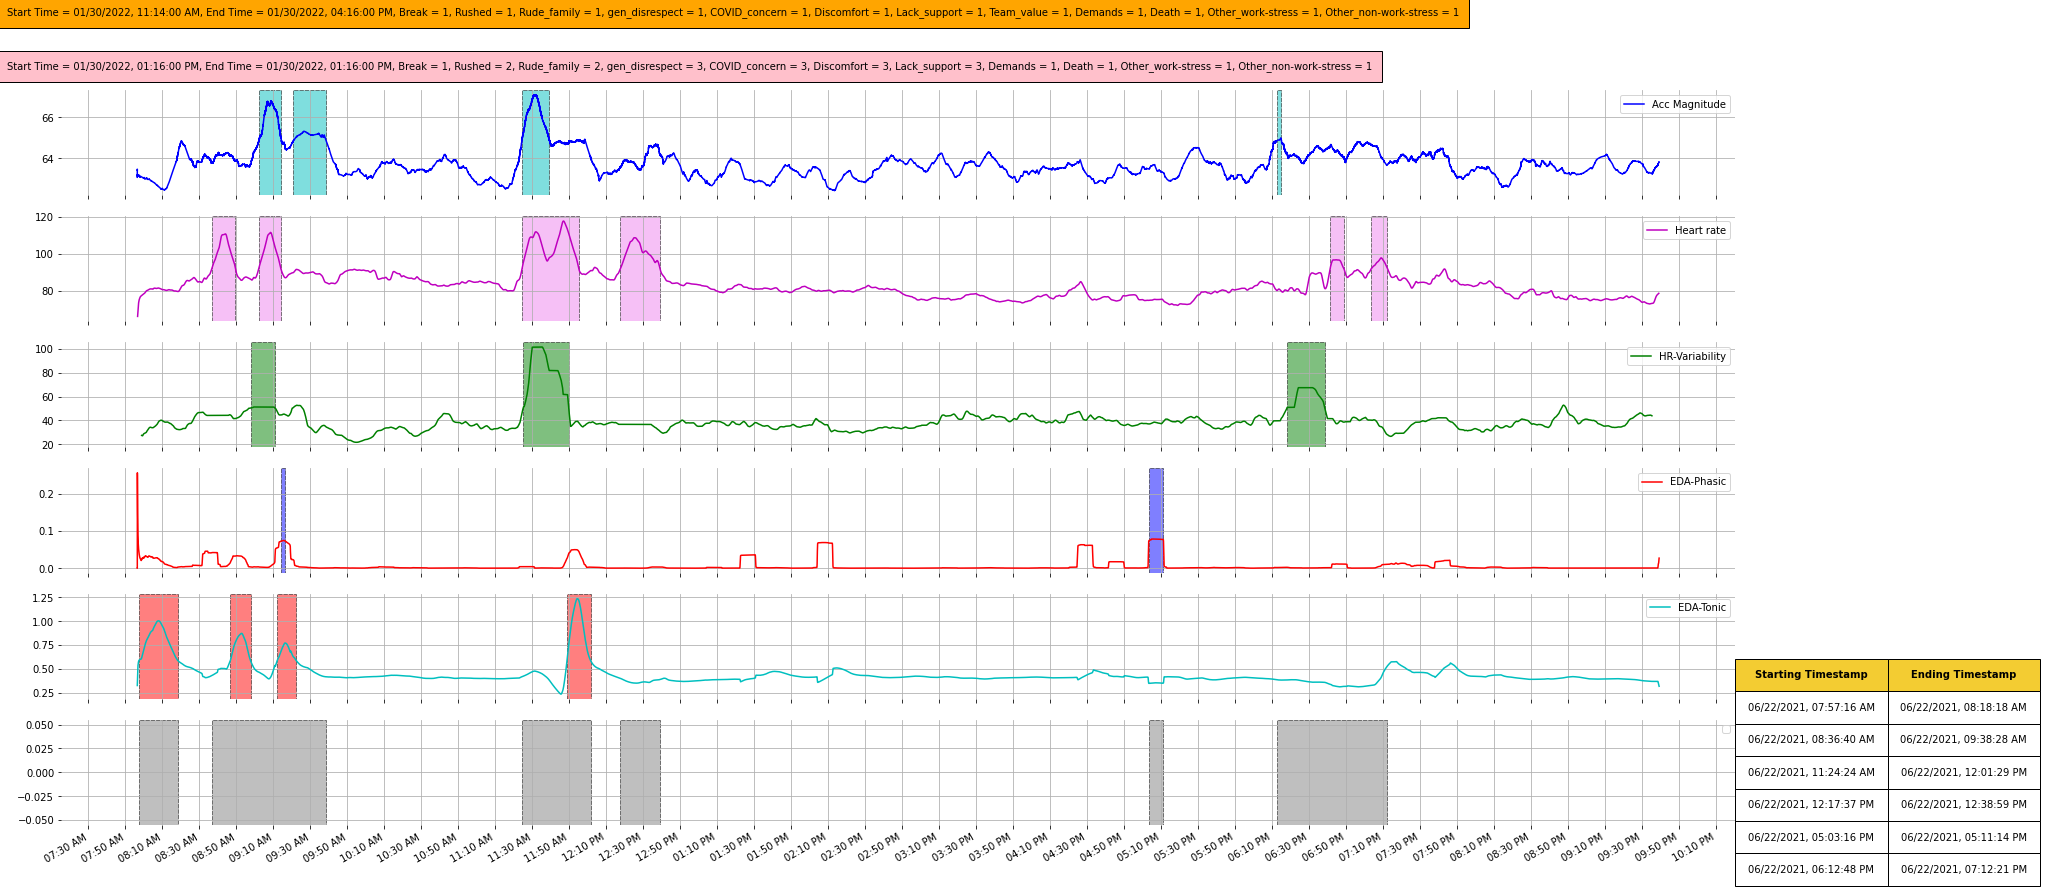

In [55]:
def stack_plot_results():
    
    ema_df = pd.read_csv('./EMA_Survey/ema.csv')
    ema_df = ema_df.iloc[2: , :]
    ema_df.reset_index(inplace=True)
    forenoon_ema_df = ema_df.iloc[[0], :]
    afternoon_ema_df = ema_df.iloc[[1], :]

    forenoon_data = []
    forenoon_data.append('Start Time = ' + str((pd.to_datetime(forenoon_ema_df['StartDate']).dt.strftime("%m/%d/%Y, %I:%M:%S %p").values)))
    forenoon_data.append('End Time = ' +  str((pd.to_datetime(forenoon_ema_df['EndDate']).dt.strftime("%m/%d/%Y, %I:%M:%S %p").values)))

    if (int(forenoon_ema_df['Break'].values)) > 0 and (int(forenoon_ema_df['Break'].values)) < 8:
        forenoon_data.append('Break = ' + (str(forenoon_ema_df['Break'].values)))
    else:
        pass

    if (int(forenoon_ema_df['Rushed'].values)) > 0 and (int(forenoon_ema_df['Rushed'].values)) < 8:
        forenoon_data.append('Rushed = ' + (str(forenoon_ema_df['Rushed'].values)))
    else:
        pass

    if (int(forenoon_ema_df['Confront_authority'].values)) > 0 and (int(forenoon_ema_df['Confront_authority'].values)) < 8:
        forenoon_data.append('Confront_authority = ' + (str(forenoon_ema_df['Confront_authority'].values)))
    else:
        pass

    if (int(forenoon_ema_df['Rude_family'].values)) > 0 and (int(forenoon_ema_df['Rude_family'].values)) < 8:
        forenoon_data.append('Rude_family = ' + (str(forenoon_ema_df['Rude_family'].values)))
    else:
        pass

    if (int(forenoon_ema_df['gen_disrespect'].values)) > 0 and (int(forenoon_ema_df['gen_disrespect'].values)) < 8:
        forenoon_data.append('gen_disrespect = ' + (str(forenoon_ema_df['gen_disrespect'].values)))
    else:
        pass

    if (int(forenoon_ema_df['COVID_concern'].values)) > 0 and (int(forenoon_ema_df['COVID_concern'].values)) < 8:
        forenoon_data.append('COVID_concern = ' + (str(forenoon_ema_df['COVID_concern'].values)))
    else:
        pass

    if (int(forenoon_ema_df['Discomfort'].values)) > 0 and (int(forenoon_ema_df['Discomfort'].values)) < 8:
        forenoon_data.append('Discomfort = ' + (str(forenoon_ema_df['Discomfort'].values)))
    else:
        pass

    if (int(forenoon_ema_df['Lack_support'].values)) > 0 and (int(forenoon_ema_df['Lack_support'].values)) < 8:
        forenoon_data.append('Lack_support = ' + (str(forenoon_ema_df['Lack_support'].values)))
    else:
        pass

    if (int(forenoon_ema_df['Team_value'].values)) > 0 and (int(forenoon_ema_df['Team_value'].values)) < 8:
        forenoon_data.append('Team_value = ' + (str(forenoon_ema_df['Team_value'].values)))
    else:
        pass

    if (int(forenoon_ema_df['Demands'].values)) > 0 and (int(forenoon_ema_df['Demands'].values)) < 8:
        forenoon_data.append('Demands = ' + (str(forenoon_ema_df['Demands'].values)))
    else:
        pass

    if (int(forenoon_ema_df['Death'].values)) > 0 and (int(forenoon_ema_df['Death'].values)) < 8:
        forenoon_data.append('Death = ' + (str(forenoon_ema_df['Death'].values)))
    else:
        pass

    if (int(forenoon_ema_df['Other_work-stress'].values)) > 0 and (int(forenoon_ema_df['Other_work-stress'].values)) < 8:
        forenoon_data.append('Other_work-stress = ' + (str(forenoon_ema_df['Other_work-stress'].values)))
    else:
        pass

    if (int(forenoon_ema_df['Other_non-work-stress'].values)) > 0 and (int(forenoon_ema_df['Other_non-work-stress'].values)) < 8:
        forenoon_data.append('Other_non-work-stress = ' + (str(forenoon_ema_df['Other_non-work-stress'].values)))
    else:
        pass

    afternoon_data = []
    afternoon_data.append('Start Time = ' + str((pd.to_datetime(afternoon_ema_df['StartDate']).dt.strftime("%m/%d/%Y, %I:%M:%S %p").values)))
    afternoon_data.append('End Time = '+  str((pd.to_datetime(afternoon_ema_df['StartDate']).dt.strftime("%m/%d/%Y, %I:%M:%S %p").values)))

    if (int(afternoon_ema_df['Break'].values)) > 0 and (int(afternoon_ema_df['Break'].values)) < 8:
        afternoon_data.append('Break = ' + (str(afternoon_ema_df['Break'].values)))
    else:
        pass

    if (int(afternoon_ema_df['Rushed'].values)) > 0 and (int(afternoon_ema_df['Rushed'].values)) < 8:
        afternoon_data.append('Rushed = ' + (str(afternoon_ema_df['Rushed'].values)))
    else:
        pass

    if (int(afternoon_ema_df['Confront_authority'].values)) > 0 and (int(afternoon_ema_df['Confront_authority'].values)) < 8:
        afternoon_data.append('Confront_authority = ' + (str(afternoon_ema_df['Confront_authority'].values)))
    else:
        pass

    if (int(afternoon_ema_df['Rude_family'].values)) > 0 and (int(afternoon_ema_df['Rude_family'].values)) < 8:
        afternoon_data.append('Rude_family = ' + (str(afternoon_ema_df['Rude_family'].values)))
    else:
        pass

    if (int(afternoon_ema_df['gen_disrespect'].values)) > 0 and (int(afternoon_ema_df['gen_disrespect'].values)) < 8:
        afternoon_data.append('gen_disrespect = ' + (str(afternoon_ema_df['gen_disrespect'].values)))
    else:
        pass

    if (int(afternoon_ema_df['COVID_concern'].values)) > 0 and (int(afternoon_ema_df['COVID_concern'].values)) < 8:
        afternoon_data.append('COVID_concern = ' + (str(afternoon_ema_df['COVID_concern'].values)))
    else:
        pass

    if (int(afternoon_ema_df['Discomfort'].values)) > 0 and (int(afternoon_ema_df['Discomfort'].values)) < 8:
        afternoon_data.append('Discomfort = ' + (str(afternoon_ema_df['Discomfort'].values)))
    else:
        pass

    if (int(afternoon_ema_df['Lack_support'].values)) > 0 and (int(afternoon_ema_df['Lack_support'].values)) < 8:
        afternoon_data.append('Lack_support = ' + (str(afternoon_ema_df['Lack_support'].values)))
    else:
        pass

    if (int(afternoon_ema_df['Team_value'].values)) > 0 and (int(afternoon_ema_df['Team_value'].values)) < 8:
        afternoon_data.append('Team_value = ' + (str(afternoon_ema_df['Team_value'].values)))
    else:
        pass

    if (int(afternoon_ema_df['Demands'].values)) > 0 and (int(afternoon_ema_df['Demands'].values)) < 8:
        afternoon_data.append('Demands = ' + (str(afternoon_ema_df['Demands'].values)))
    else:
        pass

    if (int(afternoon_ema_df['Death'].values)) > 0 and (int(afternoon_ema_df['Death'].values)) < 8:
        afternoon_data.append('Death = ' + (str(afternoon_ema_df['Death'].values)))
    else:
        pass

    if (int(afternoon_ema_df['Other_work-stress'].values)) > 0 and (int(afternoon_ema_df['Other_work-stress'].values)) < 8:
        afternoon_data.append('Other_work-stress = ' + (str(afternoon_ema_df['Other_work-stress'].values)))
    else:
        pass

    if (int(afternoon_ema_df['Other_non-work-stress'].values)) > 0 and (int(afternoon_ema_df['Other_non-work-stress'].values)) < 8:
        afternoon_data.append('Other_non-work-stress = ' + (str(afternoon_ema_df['Other_non-work-stress'].values)))
    else:
        pass

        
    rep_lst = ['[', ']', '"', "'"]
    for i in rep_lst:
        if i in str(afternoon_data):
            afternoon_data = str(afternoon_data).replace(i, '')
            
    rep_lst = ['[', ']', '"', "'"]
    for i in rep_lst:
        if i in str(forenoon_data):
            forenoon_data = str(forenoon_data).replace(i, '')

########################################################################################################################################

    
    
    print('\n', '******************************* Preparing for combined chart ****************************************', '\n')
    fig, axs = plt.subplots(nrows=6, sharex=True, subplot_kw=dict(frameon=False), figsize=(30, 15))  # frameon=False removes frames
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()
    
    plt.figtext(0.1, .95, forenoon_data, ha="left", fontsize=10, bbox={"facecolor":"orange", "alpha":2.0, "pad":10}, wrap= True)
    plt.figtext(0.1, .90, afternoon_data, ha="left", fontsize=10, bbox={"facecolor":"pink", "alpha":2.0, "pad":10},wrap = True)

    axs[0].plot(acc_df['datetime'], acc_df['MAG_K500'],
                color='b', label="Acc Magnitude")
    axs[1].plot(hr_df['datetime'], hr_df['MAG_K500'],
                color='m', label="Heart rate")
    axs[2].plot(hrv_features['datetime'], hrv_features['MAG_K500'],
                color='g',  label="HR-Variability")
    axs[3].plot(eda_phasic_df['datetime'], eda_phasic_df['MAG_K500'],
                color='r', label="EDA-Phasic")
    axs[4].plot(eda_tonic_df['datetime'], eda_tonic_df['MAG_K500'],
                color='c', label="EDA-Tonic")
    axs[5].plot(label="Active-Regions")
    
    for d in tqdm(hrv_events_df.index):
        axs[2].axvspan(hrv_events_df['Starting Timestamp'][d], hrv_events_df['Ending Timestamp'][d], facecolor="g", edgecolor="black", alpha=0.5, capstyle = 'round', linestyle = '--')

    for d in tqdm(acc_events_df.index):
        axs[0].axvspan(acc_events_df['Starting Timestamp'][d], acc_events_df['Ending Timestamp'][d], facecolor="c", edgecolor="black", alpha=0.5, capstyle = 'round', linestyle = '--')

    for d in tqdm(eda_phasic_events_df.index):
        axs[3].axvspan(eda_phasic_events_df['Starting Timestamp'][d], eda_phasic_events_df['Ending Timestamp'][d], facecolor="b", edgecolor="black", alpha=0.5, capstyle = 'round', linestyle = '--')

    for d in tqdm(eda_tonic_events_df.index):
        axs[4].axvspan(eda_tonic_events_df['Starting Timestamp'][d], eda_tonic_events_df['Ending Timestamp'][d], facecolor="r", edgecolor="black", alpha=0.5, capstyle = 'round', linestyle = '--')

    for d in tqdm(hr_events_df.index):
        axs[1].axvspan(hr_events_df['Starting Timestamp'][d], hr_events_df['Ending Timestamp'][d], facecolor="violet", edgecolor="black", alpha=0.5, capstyle = 'round', linestyle = '--')

    for d in tqdm(merged_smaller_events_2.index):
        axs[5].axvspan(merged_smaller_events_2['Starting Timestamp'][d], merged_smaller_events_2['Ending Timestamp'][d], facecolor = "grey", edgecolor='black', alpha = 0.5, capstyle = 'round', linestyle = '--')

#gbrcm 

    table = plt.table(cellText=merged_smaller_events.values, colLabels=merged_smaller_events.columns, loc='right', cellLoc='center', colColours=['#F3CC32', '#F3CC32'])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width((-1, 0, 1, 2, 3))
    table.scale(1, 3)

    for (row, col), cell in table.get_celld().items():
        if (row == 0):
            cell.set_text_props(fontproperties=FontProperties(weight='bold', size=10))

    for i in range(6):
        axs[i].legend()
        
    axs[5].xaxis.set_major_locator(mdates.MinuteLocator(interval=20))   #to get a tick every 15 minutes
    axs[5].xaxis.set_major_formatter(mdates.DateFormatter('%I:%M %p'))
    plt.gcf().autofmt_xdate()
    
    # plt.show() 
    # fig.savefig('./Stressful_Regionsss.png')
    
    
stack_plot_results()

In [33]:
merged_smaller_events

,Starting Timestamp,Ending Timestamp
1,"06/22/2021, 07:57:16 AM","06/22/2021, 08:18:18 AM"
2,"06/22/2021, 08:36:40 AM","06/22/2021, 09:38:28 AM"
3,"06/22/2021, 11:24:24 AM","06/22/2021, 12:01:29 PM"
4,"06/22/2021, 12:17:37 PM","06/22/2021, 12:38:59 PM"
5,"06/22/2021, 05:03:16 PM","06/22/2021, 05:11:14 PM"
6,"06/22/2021, 06:12:48 PM","06/22/2021, 07:12:21 PM"
